In [2]:
import torch
import torch.nn as nn

## 搭建单个RNN单元

In [2]:
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=2)  # input_size, hidden_size, num_layers 
inputs = torch.randn(size=(5, 3, 10))  # 正态分布

In [3]:
rnn

RNN(10, 20, num_layers=2)

In [4]:
inputs

tensor([[[-3.2435e-01,  2.4656e-03, -1.2136e+00,  3.2229e-01,  2.3391e-01,
          -8.5015e-02,  3.3555e-01, -1.0584e+00,  1.4420e+00, -1.4124e+00],
         [-8.1193e-01, -9.8211e-01,  2.9903e-01,  7.7410e-01, -1.6366e-03,
          -8.7670e-02,  2.7035e-02, -9.5305e-01,  1.3547e+00,  1.1713e-01],
         [ 5.6387e-01, -1.4074e+00,  1.5959e+00,  1.1203e+00,  1.5831e+00,
           1.3014e+00,  2.7621e-01,  1.0732e+00,  6.9471e-01, -1.0723e+00]],

        [[ 2.2818e-01,  9.3134e-01, -5.1635e-01,  4.2040e-02,  1.6993e+00,
           3.7868e-01,  1.8541e+00, -1.1342e+00,  8.9554e-02, -1.4275e+00],
         [ 1.5979e-01,  2.4191e+00, -3.0649e-01,  3.7792e-01, -2.0478e+00,
          -1.2837e+00,  2.9463e-01, -1.6146e+00,  3.6794e-01, -9.3952e-01],
         [-1.0416e-01, -2.0203e+00,  2.0238e+00,  9.8365e-01,  4.1544e-01,
          -1.7277e-01, -9.5692e-01, -1.1407e+00, -4.2189e-01, -8.2205e-01]],

        [[-7.4630e-01,  2.9744e-01,  4.1839e-01,  1.5844e+00, -1.5178e+00,
          -4.36

In [5]:
h0 = torch.randn(2, 3, 20)  # num_layers * num_directions, batch, hidden_size

In [6]:
h0

tensor([[[-6.7300e-01,  6.1654e-01,  1.0610e-01, -3.1575e-01, -5.5555e-01,
           2.5927e-01,  9.9221e-01, -1.7514e+00,  1.5287e+00,  2.1910e-01,
           1.3009e+00,  4.0971e-01,  7.5989e-01, -7.0331e-02, -9.8764e-01,
          -2.3124e-01, -2.3785e-01, -1.0402e-01, -1.9958e+00,  1.3303e+00],
         [-1.2212e+00,  9.8364e-01,  5.6951e-01, -8.9267e-01, -1.5610e-01,
          -2.6921e+00,  3.5487e-01, -5.6014e-01, -1.9095e-01,  5.4416e-01,
          -1.6134e+00,  2.0536e+00, -1.1428e+00, -5.7850e-01,  7.5401e-01,
          -8.6117e-02,  4.9139e-01,  1.4922e+00, -4.8426e-02, -5.3240e-02],
         [-1.6309e+00,  7.1899e-01,  5.2579e-01,  8.6822e-05,  2.5112e-01,
           7.4081e-02, -1.3915e+00,  2.1498e+00, -2.3179e-01,  1.2086e-02,
          -9.2872e-02, -1.4543e+00,  6.4411e-01, -5.3025e-01,  4.1517e-01,
           6.1355e-01,  1.4097e+00, -4.4720e-01,  1.6556e+00, -4.7210e-01]],

        [[-9.3173e-01,  8.7550e-01,  9.9409e-01, -1.7093e+00,  1.2611e-01,
           6.8443e-0

In [7]:
output, hn = rnn(inputs, h0)

In [8]:
output.shape

torch.Size([5, 3, 20])

In [9]:
hn.shape

torch.Size([2, 3, 20])

可以看出输入输出以及隐藏层 $h$ 的 `shape` 是一致的。

## 搭建正式的RNN网络

https://www.dezyre.com/recipes/run-basic-rnn-model-using-pytorch

### 数据准备

In [17]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 随机种子
torch.manual_seed(1)    # reproducible

In [20]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [21]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


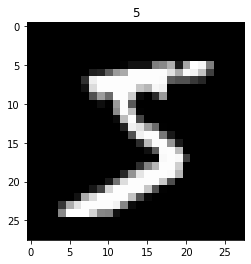

In [22]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [23]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=BATCH_SIZE, shuffle=True)

In [25]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000] / 255.
# shape (2000, 28, 28) value in range(0,1)

test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 网络结构

In [27]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. 
                                    # e.g. (batch, time_step, input_size)
        )                           # (batch, seq, feature)

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state
        # 官方文档中，如果(h_0, c_0)是None，那么默认归0

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [28]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [34]:
# training and testing
for epoch in range(EPOCH):                              # 训练一轮
    for step, (x, y) in enumerate(train_loader):        # gives batch data，一个bathc 64
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', epoch, 
                  '| train loss: %.4f' % loss.item(), 
                  '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3141 | test accuracy: 0.13
Epoch:  0 | train loss: 1.1862 | test accuracy: 0.63
Epoch:  0 | train loss: 0.4297 | test accuracy: 0.76
Epoch:  0 | train loss: 0.7671 | test accuracy: 0.76
Epoch:  0 | train loss: 0.3726 | test accuracy: 0.86
Epoch:  0 | train loss: 0.3405 | test accuracy: 0.88
Epoch:  0 | train loss: 0.0815 | test accuracy: 0.90
Epoch:  0 | train loss: 0.3120 | test accuracy: 0.92
Epoch:  0 | train loss: 0.3830 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3803 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1500 | test accuracy: 0.94
Epoch:  0 | train loss: 0.5119 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2371 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0500 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1033 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1397 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2930 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0974 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1451 | test accuracy

In [35]:
test_output = rnn(test_x[:10].view(-1, 28, 28))

pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
